# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv(r'C:\Users\leube\Downloads\paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.shape

(6362620, 11)

In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# lets make a sample out of this to not crash my computer
#data = data.sample(frac=0.5, random_state=42)

In [7]:
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [8]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

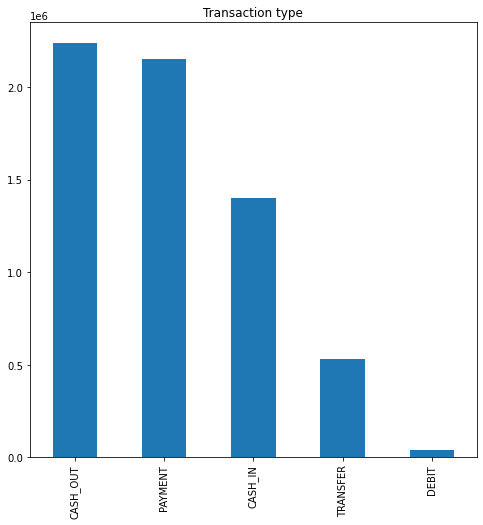

In [9]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

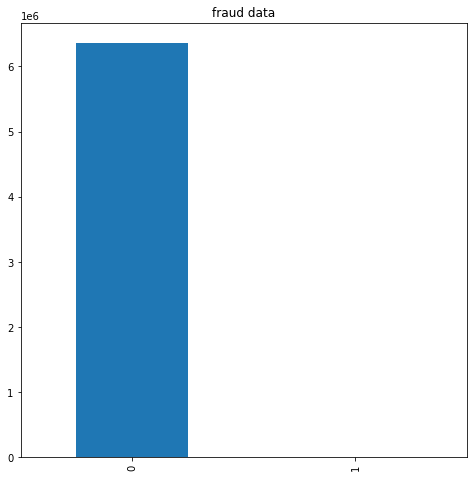

In [10]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [11]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\leube\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

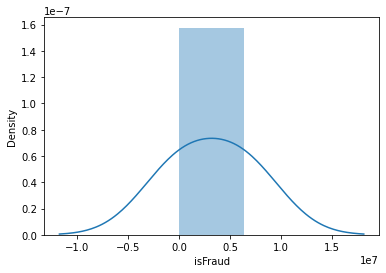

In [12]:
sns.distplot(data.isFraud.value_counts())

In [ ]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [ ]:
# Your response here
#the distribution is right skewed

# once again the lab is being very unprecis, distribution of what feature? frauf or not fraud?
# but yes if we talk about that feature the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
# Your code here
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
print(data.shape)
print(data['nameOrig'].value_counts())
len(data['nameOrig'].value_counts())/len(data)

(6362620, 11)
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64


0.9985362947967975

In [15]:
print(data.shape)
print(data['nameDest'].value_counts())
len(data['nameDest'].value_counts())/len(data)

(6362620, 11)
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64


0.4278680795018404

In [ ]:
# high cardinality for columns above, will not have an impact on the model

In [16]:
del data['nameDest']
del data['nameOrig']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [18]:
# encode rest of categorcial data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['type'])
data['type'] = le.transform(data['type'])

In [19]:
# not sure what step stands for so no idea what to do with it
data['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [20]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [21]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
from sklearn.metrics import accuracy_score
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn import metrics
from sklearn.metrics import classification_report

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [22]:
def generate_results(prediction, y_test, model, x_test):
    print('The accuracy of the Tree is', '{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))

    # matrix

    cm = metrics.plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    cm.ax_.set_title(f'{model} Confusion matrix, without normalization');

In [23]:
X = data.drop(['isFraud','isFlaggedFraud'],axis=1)
y = data['isFraud']

In [24]:
X = data.drop(['isFraud','isFlaggedFraud'],axis=1)
y = data['isFraud']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# Your code here
from sklearn.linear_model import LogisticRegression

pipe1 = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', LogisticRegression())
])

In [36]:
pipe1.fit(x_train, y_train)
 
print('Training set score: ' + str(pipe1.score(x_train,y_train)))
print('Test set score: ' + str(pipe1.score(x_test,y_test)))

Training set score: 0.9992119991450064
Test set score: 0.9992000150881241


In [37]:
predictions1 = pipe1.predict(x_test)

The accuracy of the Tree is 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.42      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


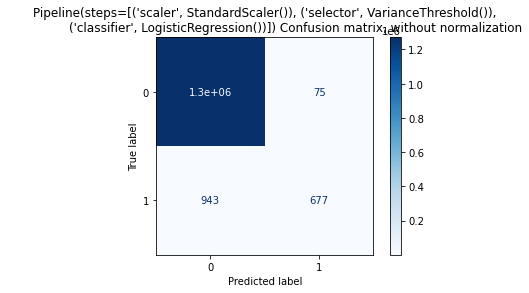

In [38]:
generate_results(predictions1,y_test,pipe1,x_test)

In [ ]:
# pretty good though already, unsure of what to improve here

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# lets take a sample to not stress my computer too much, has been workinf for twenty minutes and I want to keep working

In [ ]:
datasam = data.sample(frac=0.2,random_state=42)

In [ ]:
X = datasam.drop(['isFraud','isFlaggedFraud'],axis=1)
y = datasam['isFraud']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# never mind, worked anyway

In [27]:
# Your code here
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', AdaBoostClassifier())
])

In [28]:
pipe.fit(x_train, y_train)
 
print('Training set score: ' + str(pipe.score(x_train,y_train)))
print('Test set score: ' + str(pipe.score(x_test,y_test)))

Training set score: 0.999361112246213
Test set score: 0.9993705423237597


In [29]:
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
generate_results(predictions,y_test,pipe,x_test)

The accuracy of the Tree is 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.55      0.69      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.77      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524



C:\Users\leube\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


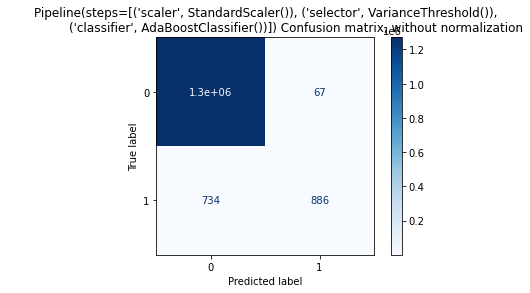

In [34]:
generate_results(predictions,y_test,pipe,x_test)

### Which model worked better and how do you know?

In [ ]:
# Your response here

# how to define beter in thsi case is the interesting question, in the previous task I was asked to compare the accuracy
#scores of the two models, in this case this metric is misleading, we do not only want general accuracy, we want especially 
# accuacy when it comes to detecting fraudulent transactions, which in this case here are only detected ruffly half of the time

# in terms of precison, recall and f1 score, the scores we have to lie bigger emphasis on when working with inbalanced data
# the second model showed a better performance

### Let's use NearMiss method for undersampling and compare the results with previous

In [41]:
! pip install imblearn

In [42]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\leube\anaconda4\lib\site-packages\sklearn\base.py)

In [43]:
# cannot import imblearn on jupyter, lets continue lab in spider
data.to_csv(r'C:\Users\leube\Ironhack\cloned_labs\module_3\Lab_12_Imbalance\cleaned_data.csv')

In [ ]:
# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2),
                         LinearSVC())
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

### And now let's apply SMOTE

### Apply your model on improved data

### Calculate classification report for imbalanced data to evaluate the models

### What is your conclusion?